<a href="https://colab.research.google.com/github/carolinampessoa/TechChallengeFase1/blob/main/TechChallengeFase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Passo 0: Importação de bibliotecas**


In [ ]:
# Bibliotecas para leitura e carregamento de dataset do Kaggle
import kagglehub
import pandas as pd
import os
# Bibliotecas para visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt
# Bibliotecas para ajuste de dados
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
# Bibliotecas para treinamento de modelos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
# Bibliotecas para validação de modelos
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import statsmodels.api as sm

**Passo 1: Exploração de dados**

Baixando a base de dados e explorando suas características


In [ ]:
path = kagglehub.dataset_download("mirichoi0218/insurance");
df = pd.read_csv(os.path.join(path, "insurance.csv"));

# Exibindo as primeiras linhas e formato do DataFrame
print(df.head());
print("Formato do dataset (linhas, colunas):", df.shape);

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Formato do dataset (linhas, colunas): (1338, 7)


Base de dados de composta por 1338 registros e 7 colunas, sendo 6 variáveis de entrada (idade, genero, IMC, número de filhos, fumante e região) e uma váriavel de saída (custos - variável target).

In [ ]:
# Características do DataFrame
print("\nInformações do DataFrame:");
print(df.info());  # Tipos de dados: categóricas(sex, smoker, region), inteiro (age, children) e float (BMI, charges).


Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


Tipos de dados presentes no dataset: categóricas (sex, smoker, region), inteiros (age, children) e float (BMI, charges). Não existem valores nulos na base de dados.


Estatísticas descritivas:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

Distribuição das variáveis  numéricas:


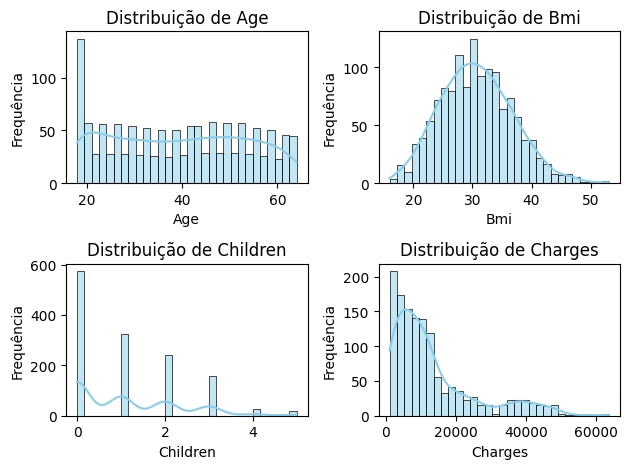

In [45]:
print("\nEstatísticas descritivas:")
print(df.describe())
print("\nDistribuição das variáveis  numéricas:")
num_attribs = list(df.select_dtypes(include=['number']))

for i, var in enumerate(num_attribs):
    plt.subplot(2, 2, i + 1) # Cria uma grade de 2x2 subplots
    sns.histplot(df[var], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribuição de {var.capitalize()}')
    plt.xlabel(var.capitalize())
    plt.ylabel('Frequência')

plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

Insights das métricas e análises de distribuição:

* Custos: grande maioria das pessoas com custos médicos entre 1k e 20k. Distribuição de custos altamente assimétrica à direita, com alguns pacientes incorrendo em custos significativamente altos (mais de R$ 50k). Isso pode indicar a presença de casos especiais, como pacientes com doenças crônicas ou tratamentos caros. Pode ser necessário um tratamento específico para lidar com esses outliers;
* Idade: distribuição relativamente uniforme entre 18 e 64 anos. Média próxima da mediana, indicando certa simetria. A amostra representa bem diferentes faixas etárias sem um viés muito forte para jovens ou idosos (embora seja limitada a 64 anos).
* BMI: Dados variando entre 15.96 (muito abaixo do peso) e 53,13 (obesidade severa). A distribuição é levemente assimétrica à direita, indicando a presença de pacientes com IMC significativamente alto.
* Filhos: distribuição bastante assimétrica à direita, ou seja, a grande maioria das pessoas avaliadas tem poucos filhos.

Avaliando a correlação individual das variáveis de entrada numéricas com a variável target:

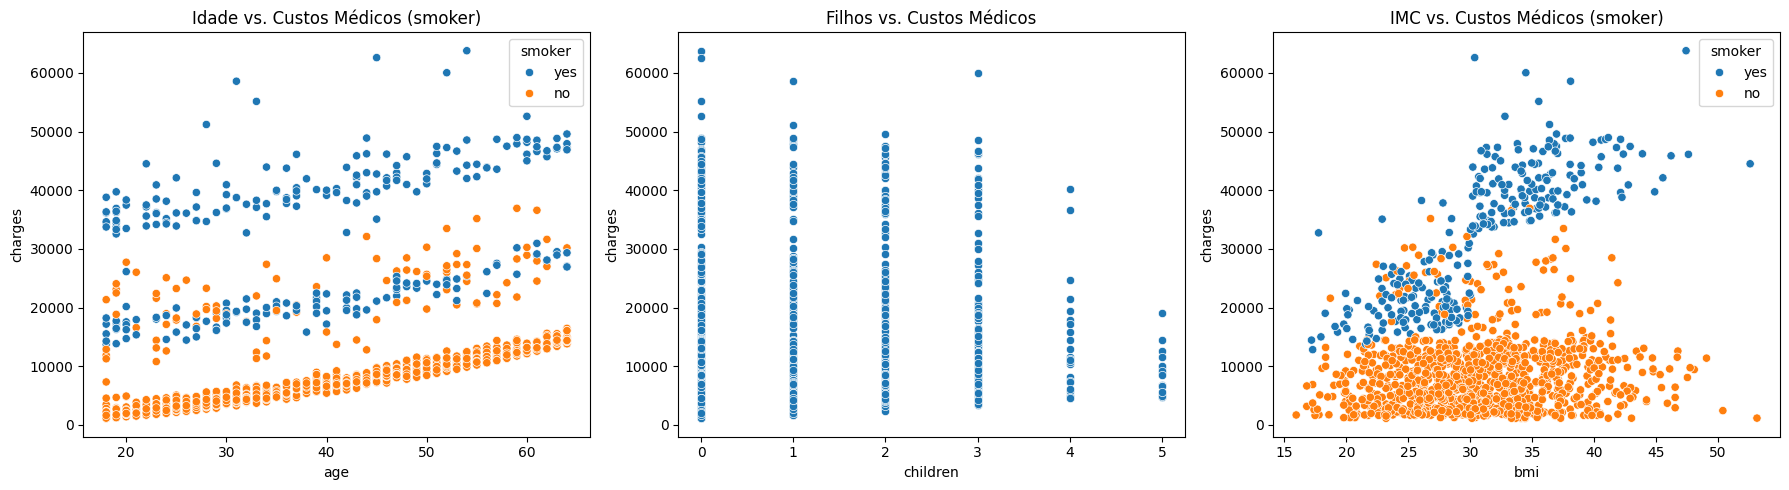

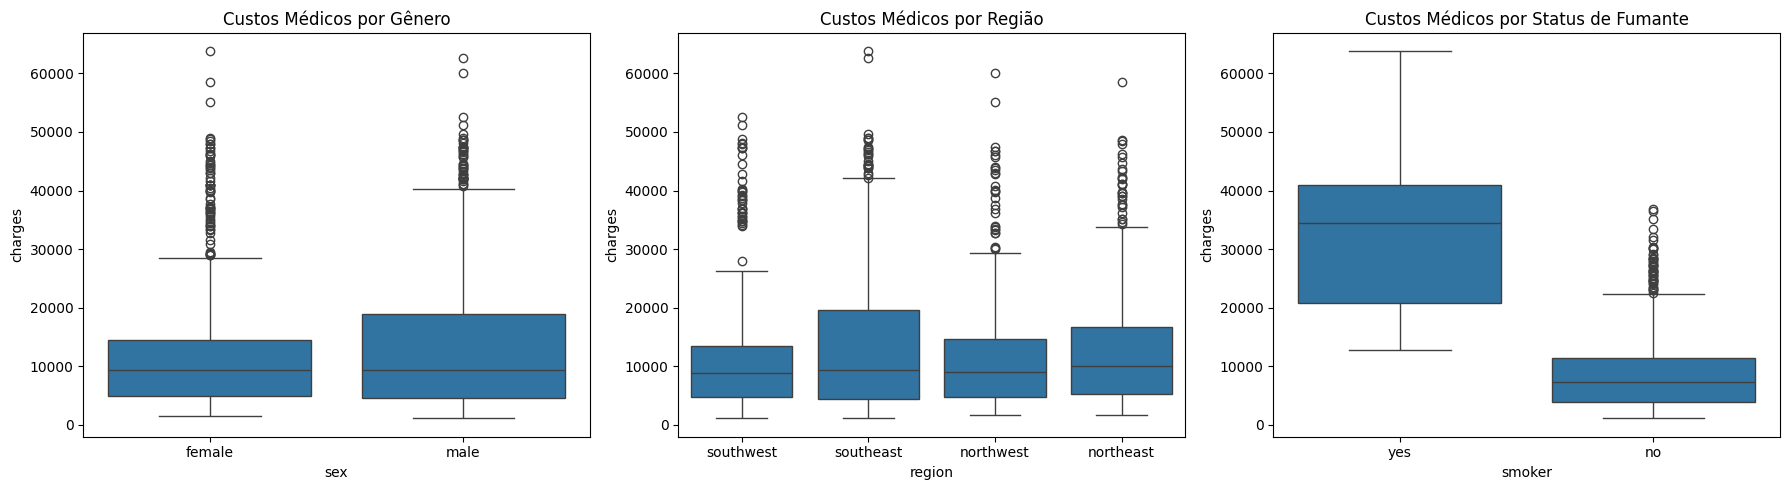

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 linha, 3 colunas

# 1. Scatterplot: Idade vs. Custos Médicos
sns.scatterplot(x='age', y='charges', hue='smoker', data=df, ax=axes[0])
axes[0].set_title("Idade vs. Custos Médicos (smoker)")

# 2. Scatterplot: Filhos vs. Custos Médicos
sns.scatterplot(x='children', y='charges', data=df, ax=axes[1])
axes[1].set_title("Filhos vs. Custos Médicos")

# 3. Scatterplot: BMI vs. Custos Médicos
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, ax=axes[2])
axes[2].set_title("IMC vs. Custos Médicos (smoker)")

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 linha, 3 colunas

# 1. Boxplot: Custos Médicos por Genero
sns.boxplot(x='sex', y='charges', data=df, ax=axes[0])
axes[0].set_title("Custos Médicos por Gênero")

# 2. Boxplot: Custos Médicos por Região
sns.boxplot(x='region', y='charges', data=df, ax=axes[1])
axes[1].set_title("Custos Médicos por Região")

# 3. Boxplot: Custos Médicos por Status de Fumante
sns.boxplot(x='smoker', y='charges', data=df, ax=axes[2])
axes[2].set_title("Custos Médicos por Status de Fumante")

plt.tight_layout()
plt.show()


Conclusões gerais e principais insights da análise de dados:

* O status de fumante (smoker) é, de longe, a variável com o impacto mais claro e significativo nos custos médics;
* A idade é outro preditor robusto, com custos aumentando consistentemente à medida que a pessoa envelhece;
* O IMC tem uma relação positiva com os custos, mas com uma variabilidade considerável. Sua influência pode ser mais aparente quando combinada com outros fatores (como fumar);
* O número de filhos, por si só, não parece ser um fator determinante para os custos do plano de saúde;
* A região onde o paciente reside também tem um impacto discernível, com o Southeast mostrando custos consistentemente mais altos. Isso pode indicar diferenças socioeconômicas, de estilo de vida ou de acesso à saúde;
* O gênero, isoladamente, parece ter um impacto marginal nos custos, com uma pequena diferença na mediana, mas sem grande poder explicativo;
* Todos os box plots reforçam a natureza assimétrica dos charges (com a cauda longa para cima, indicando muitos outliers de alto custo);
* A visualização Idade vs. Custos (smoker) e IMC vs. Custos (smoker) demonstra a importância de explorarmos as interações entre as variáveis;
* A presença de outliers sugere a necessidade de técnicas robustas ou transformações nos dados para modelagem eficaz.

**Passo 2: Pré-processamento de dados**

Limpeza de dados: conforme avaliado anteriormente, a base de dados não possui dados nulos. Caso contrário, poderia ser usada técnicas como substituição pela média ou mediana e criado um pipeline específico para isso com a classe *Imputer* do scikit-learn.

Normalizando as variáveis numéricas para compensar diferenças de escala e convertendo as variáveis categóricas (gênero, status de fumante e região) em formatos adequados para modelagem:

In [49]:

num_attribs = list(df.select_dtypes(include=['number']).columns.drop("charges"));  # Selecionando colunas numéricas
cat_attribs = list(df.select_dtypes(include=['object']).columns);  # Selecionando colunas categóricas

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),# tratando as variáveis numéricas (normalização)
        ("cat", OneHotEncoder(), cat_attribs), # tratando as variáveis categóricas
    ]);


**Passo 3: Modelagem**

Criando diferentes modelos para posterior treinamento e comparação da capacidade preditiva:

In [50]:
# Regressão Linear (simples, interpretável).
model_lr = LinearRegression();

# Árvore de Decisão
model_dtr = DecisionTreeRegressor(random_state=42);

# Regressão com Random Forest
model_rfr = RandomForestRegressor(random_state=42);

# Regressão com KNN
model_knn = KNeighborsRegressor(n_neighbors=5);

# Regressão com XGBoost com otimização de parâmetros (lida bem com não linearidades e interações entre variáveis).
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0,],
    'colsample_bytree': [0.8, 1.0]
}

model_xgb = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',  # Ou 'neg_mean_squared_error'
    cv=3,
    verbose=1,
    n_jobs=-1  # Usa todos os núcleos da CPU
)

Dividindo o conjunto de dados em subconjuntos de treinamento e teste e aplicando a pipeline de pré-processamento em cada um:

In [55]:

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42);

def preProcessamento(dataset):
    x = dataset.drop("charges", axis=1)  # Apagando a target para a base de treino (X)
    y = dataset.pop("charges")  # Separando a coluna target (charges) do DataFrame de treino (Y)
    y_log = np.log(y)  # Transformando a variável target charges em log para lidar com a assimetria dos dados
    x_prepared = full_pipeline.fit_transform(x)  # Aplicando o pipeline de pré-processamento
    x_prepared = pd.DataFrame(x_prepared, columns=num_attribs + list(full_pipeline.named_transformers_['cat'].get_feature_names_out(cat_attribs)))  # Convertendo para DataFrame
    return x_prepared, y, y_log

x_train, y_train, y_train_log = preProcessamento(df_train)  # Pré-processando os dados de treino
x_test, y_test, y_test_log = preProcessamento(df_test)  # Pré-processando os dados de teste


A variável target (custos) foi transformada por uma função logarítimica a fim de lidar com a assimemtria dos dados e outliers. Foi cogitada a possibilidade de remoção dos outliers, porém isso limitaria o modelo a uma faixa específica de predição, limitando-se a valores típicos. Assim, optou-se pela transformação da variável buscando-se um modelo mais generalista.

In [57]:
# Lista de modelos e seus nomes
modelos = {
    "Linear Regression": model_lr,
    "Decision Tree": model_dtr,
    "Random Forest": model_rfr,
    "KNN": model_knn,
    "XGBoost": model_xgb
}


Fitting 3 folds for each of 72 candidates, totalling 216 fits


**Passo 4: Treinamento e avaliação do modelo**

Criando função para treinamento e avaliação dos modelos, para posterior comparação:

In [58]:
def avaliar_modelos(modelos, x, y_real, usar_log=False):
    """
    Avalia múltiplos modelos e retorna um DataFrame com métricas de desempenho.

    Parâmetros:
    - modelos: dicionário {nome: modelo}
    - x: conjunto de entrada (features)
    - y_real: valores reais (target)
    - usar_log: True se os modelos foram treinados com log(y) e precisam de np.exp() nas previsões

    Retorna:
    - DataFrame com R², RMSE, MAE e MAPE
    """
    resultados = {
        "Modelo": [],
        "R²": [],
        "RMSE": [],
        "MAE": [],
        "MAPE (%)": []
    }

    for nome, modelo in modelos.items():
        y_pred = modelo.predict(x)
        if usar_log:
            y_pred = np.exp(y_pred)

        errors = np.abs(y_real - y_pred)
        relative_errors = errors / np.abs(y_real)
        mape = np.mean(relative_errors) * 100

        resultados["Modelo"].append(nome)
        resultados["R²"].append(r2_score(y_real, y_pred))
        resultados["RMSE"].append(np.sqrt(mean_squared_error(y_real, y_pred)))
        resultados["MAE"].append(mean_absolute_error(y_real, y_pred))
        resultados["MAPE (%)"].append(mape)

    return pd.DataFrame(resultados).round(2)

In [67]:
# Treinando os modelos com a variável target original, sem transformação logaritmica
for nome, modelo  in modelos.items():
    modelo.fit(x_train, y_train);

Fitting 3 folds for each of 72 candidates, totalling 216 fits


**Passo 5: Validação estatística**





Avaliando a capacidade de generalização dos modelos utilizando o conjunto de teste:

In [62]:
df_resultados_teste = avaliar_modelos(modelos, x_test, y_test, usar_log=False)
print("\nResultados dos Modelos:\n")
print(df_resultados_teste)


Fitting 3 folds for each of 72 candidates, totalling 216 fits

Resultados dos Modelos:

              Modelo    R²     RMSE      MAE  MAPE (%)
0  Linear Regression  0.78  5795.33  4167.87     46.25
1      Decision Tree  0.78  5789.69  2745.98     34.67
2      Random Forest  0.86  4650.11  2756.87     36.33
3                KNN  0.78  5888.82  3626.04     39.70
4            XGBoost  0.88  4272.21  2408.53     29.49


In [72]:
# Treinando os modelos com a variável target transformada em log para lidar com a assimetria dos dados
for nome, modelo  in modelos.items():
    modelo.fit(x_train, y_train_log);

df_resultados_teste = avaliar_modelos(modelos, x_test, y_test, usar_log=True)
print("\nResultados dos Modelos:\n")
print(df_resultados_teste)

Fitting 3 folds for each of 72 candidates, totalling 216 fits

Resultados dos Modelos:

              Modelo    R²     RMSE      MAE  MAPE (%)
0  Linear Regression  0.58  8050.05  4011.62     28.86
1      Decision Tree  0.75  6171.27  2978.59     36.48
2      Random Forest  0.87  4413.00  2249.35     22.44
3                KNN  0.74  6326.59  3453.60     28.24
4            XGBoost  0.88  4310.42  1958.12     15.56


A transformação logaritmica da variável target reduziu o MAE e MAPE de todos os modelos, porém aumentou o RMSE. Isso sugere que o modelo pode estar fazendo um trabalho melhor em prever a proporção do erro, ou seja, está mais focado em obter a ordem de magnitude correta para valores grandes, e é mais sensível a pequenos erros para valores pequenos.
Quando você faz a "back-transformation" (exponencial), pequenos erros na escala logarítmica podem se tornar grandes erros absolutos na escala original, especialmente para valores de y que são grandes.
Impacto nos Erros Absolutos vs. Percentuais:

MAE e MAPE: A transformação logarítmica frequentemente ajuda o modelo a capturar melhor as relações multiplicativas nos dados, o que é comum em variáveis com assimetria à direita como custos (onde a taxa de aumento pode ser mais importante que o valor absoluto).
Ao focar em log(y), o modelo pode ser mais preciso em termos percentuais. Se o modelo prevê log(y) + 0.1, ao reverter, isso pode significar y * exp(0.1), que é um erro percentual razoável.
Portanto, a redução no MAE e MAPE indica que, no geral, o modelo está fazendo previsões que são percentualmente mais próximas dos valores reais, e a média dos erros absolutos pode ser menor porque os erros em valores menores são mais controlados.
RMSE: O RMSE é dominado por erros grandes. Se a transformação logarítmica, ao reverter, amplifica mesmo um pequeno erro percentual em um valor de alvo muito grande, esse erro amplificado é quadrado e tem um impacto enorme no RMSE.
Imagine que o modelo errou em 1 unidade na escala logarítmica para um valor que era log(1000) e para um que era log(100000). Ao reverter, o erro absoluto para 100000 será muito maior, e o quadrado desse erro dominará o RMSE.
Então, o aumento do RMSE sugere que, embora o modelo possa ser melhor em termos de precisão relativa ou média dos erros, ele está cometendo alguns erros absolutos muito grandes em poucas instâncias de alto valor (os outliers de alto custo, que você já identificou).
Em Resumo:
MAE e MAPE diminuindo: Sinaliza que o modelo está, em geral, melhor em termos de precisão relativa e na média dos erros absolutos, especialmente para a maioria dos pontos de dados (os valores menores de custos). A transformação logarítmica ajudou o modelo a aprender padrões que são mais proporcionais à magnitude dos custos.
RMSE aumentando: Indica que a transformação logarítmica (e a subsequente "back-transformation") está levando a alguns erros absolutos muito grandes para um pequeno número de observações de alto valor (os outliers de custo). Esses erros extremos, quando elevados ao quadrado, distorcem o RMSE para cima.
O que isso significa para sua análise?
Validade do Modelo: Se o seu objetivo principal é prever a ordem de magnitude ou ter uma precisão percentual razoável (por exemplo, "prever o custo em até 10% do valor real"), a transformação logarítmica e a melhoria do MAE/MAPE são indicadores positivos.
Atenção aos Outliers: O aumento do RMSE é um alerta de que o modelo ainda tem dificuldade em prever os valores de custos mais extremos quando revertidos para a escala original. É crucial reavaliar os outliers de custo, tanto na escala original quanto na logarítmica. Talvez esses outliers sejam reais e difíceis de prever, ou talvez você precise de um modelo mais sofisticado para lidar com eles.
Escolha da Métrica: Qual métrica é mais importante para o seu problema de negócio?
Se pequenas diferenças absolutas em valores muito grandes não são tão críticas quanto a precisão percentual, então MAE e MAPE são mais relevantes.
Se mesmo um único erro absoluto muito grande pode ter consequências financeiras graves, então o RMSE é uma métrica mais importante a ser otimizada.
Nesse cenário de custos médicos, onde alguns pacientes podem ter custos muito altos e a distribuição é assimétrica, é muito comum que a transformação logarítmica melhore MAE e MAPE. O aumento do RMSE geralmente significa que o modelo, embora melhor para a maioria, ainda "erra feio" em alguns dos casos mais caros quando revertido. Isso é algo a se investigar, talvez aplicando técnicas de capagem (winsorization) ou usando modelos robustos a outliers, como discutido anteriormente.

Gráficos de previsões vs valores reais:

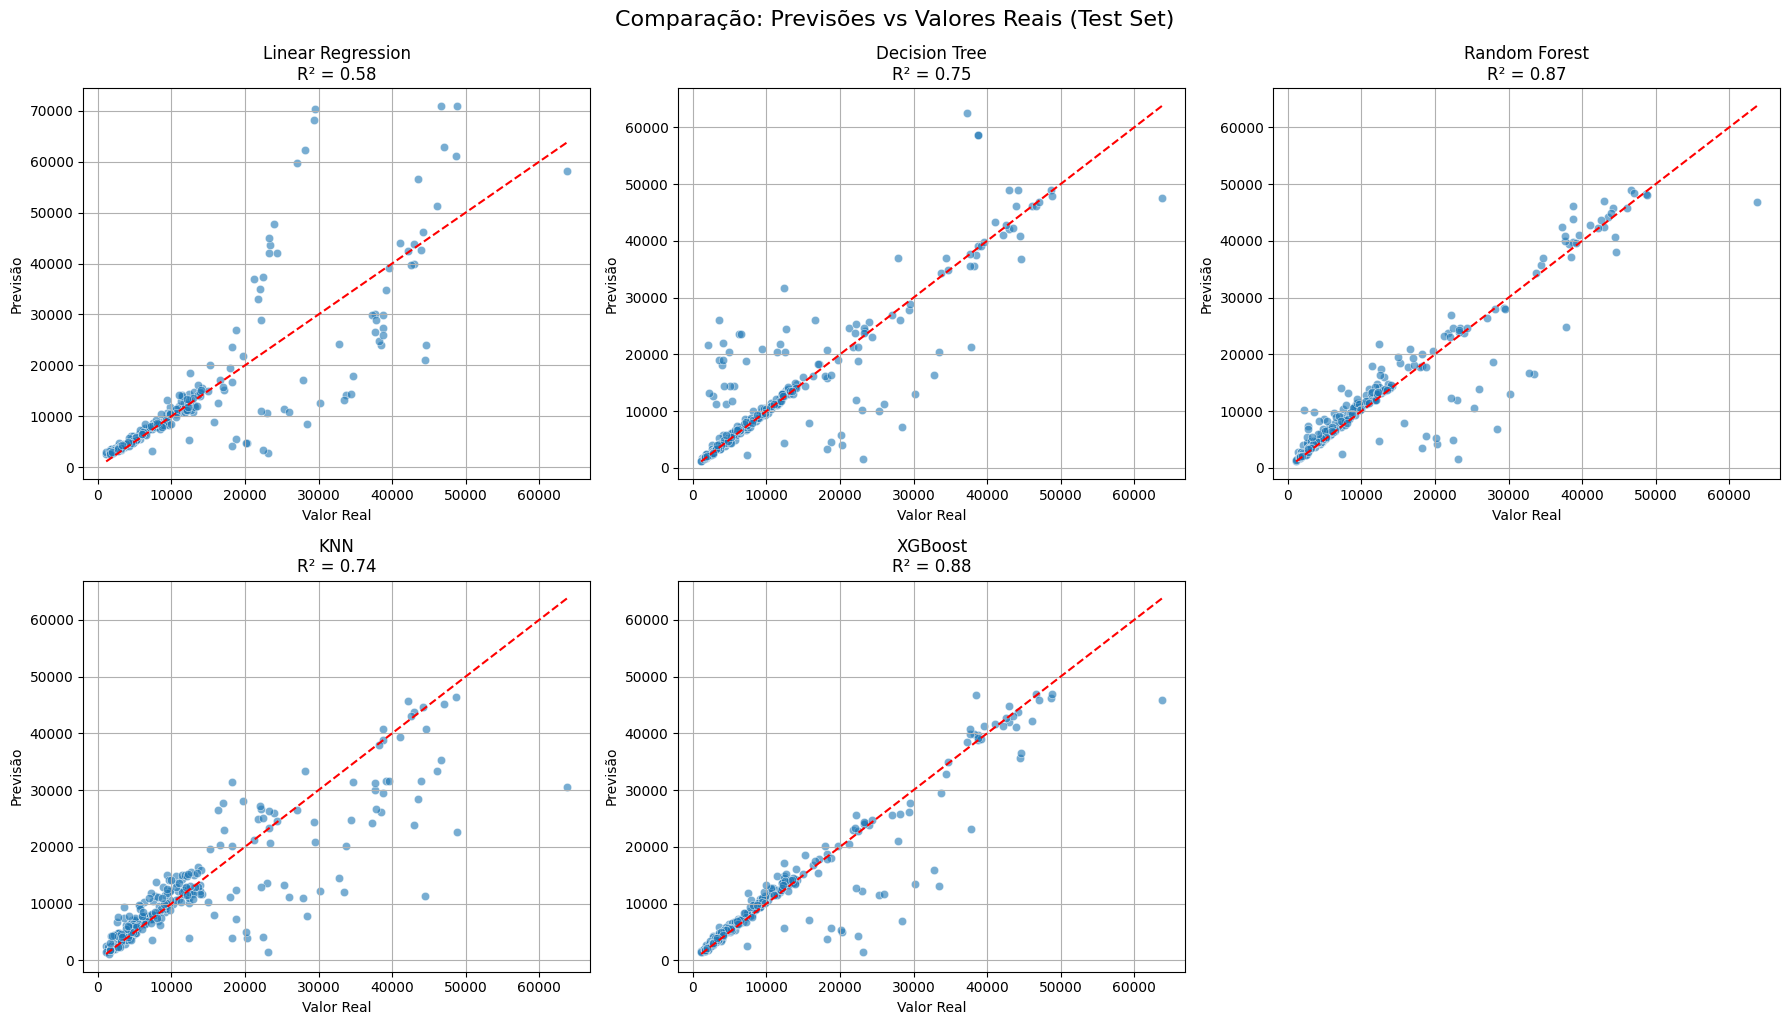

In [73]:
# Obter previsões de todos os modelos no conjunto de teste
y_preds = {}
for nome, modelo in modelos.items():
    y_pred = modelo.predict(x_test)
    y_pred = np.exp(y_pred)  # Inverte a transformação log
    y_preds[nome] = y_pred

# Criar os gráficos em uma grade 2x3
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Plotar os gráficos
for i, (nome, y_pred) in enumerate(y_preds.items()):
    ax = axes[i]
    sns.scatterplot(x=y_test, y=y_pred, ax=ax, alpha=0.6)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    ax.set_title(f'{nome}\nR² = {r2_score(y_test, y_pred):.2f}')
    ax.set_xlabel('Valor Real')
    ax.set_ylabel('Previsão')
    ax.grid(True)

# Remover subplot extra (posição 6 não usada)
if len(y_preds) < len(axes):
    for j in range(len(y_preds), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Comparação: Previsões vs Valores Reais (Test Set)\n", fontsize=16, y=1.02)
plt.show()

Conclusões:

*   Os modelos RandomForest e XGBoost, ambos baseados em árvores de decisão, foram os que apresentaram melhor desempenho na predição dos custos;
*   Embora o XGBoost tenha apresentado estatísticas de erro menores, seu treinamento exige mais esforço computacional que o RandomForest, o que pode ser um problema caso queiramos replicar esse processo em bases de dados muito grandes;
